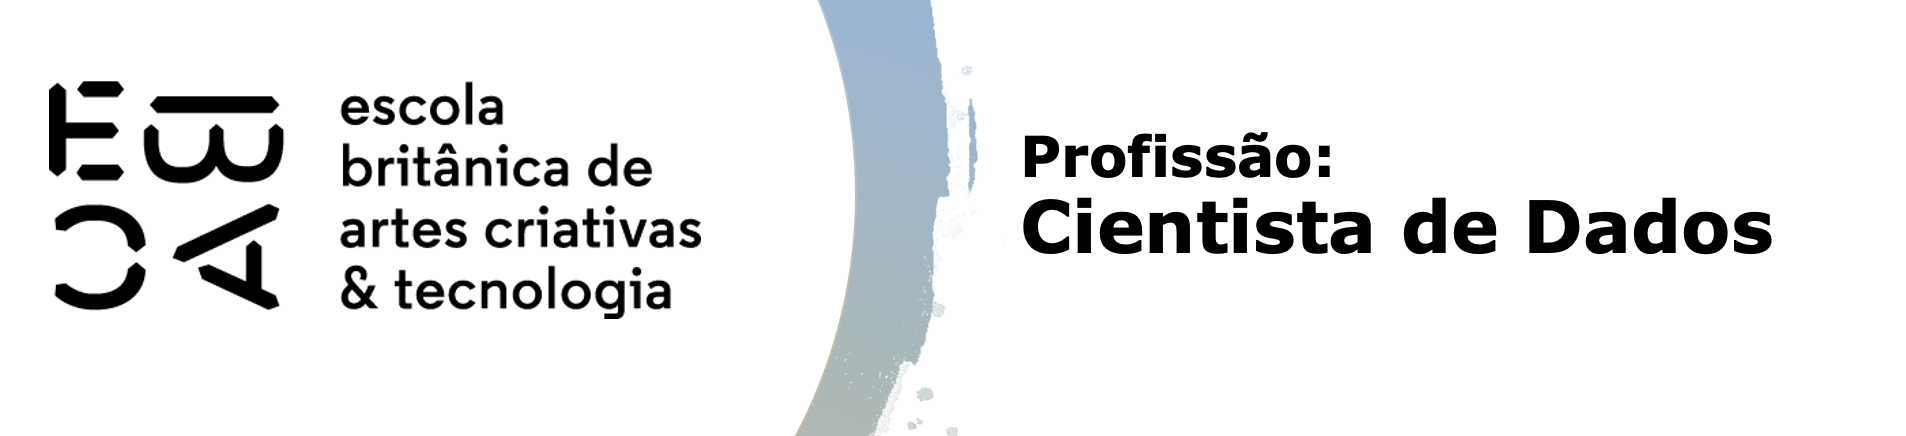

# Métodos hierárquicos de agrupamento - Tarefa

In [2]:
# IMPORTANDO AS BIBLIOTECAS E PACOTES NECESSÁRIOS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.



### 1.1 Selecione as variáveis quantitativas da base de pinguins

In [21]:
# Carregando a base de dados
peng = sns.load_dataset('penguins')


In [22]:
# Selecionando as variáveis quantitativas
peng_quant = peng.select_dtypes('number')

### 1.2 Elimine valores faltantes


In [23]:
peng_quant = peng_quant.dropna()

### 1.3 Padronize as variáveis para média zero e desvio padrão 1


In [24]:
# Padronizando as variáveis para média zero e desvio padrão 1
scaler = StandardScaler()
peng_scaled = scaler.fit_transform(peng_quant)


### 1.4 Faça um agrupamento hierárquico dividindo essa base em 3 grupos


In [26]:
# Realizando o agrupamento hierárquico
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(peng_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### 1.5 Faça o Dendrograma

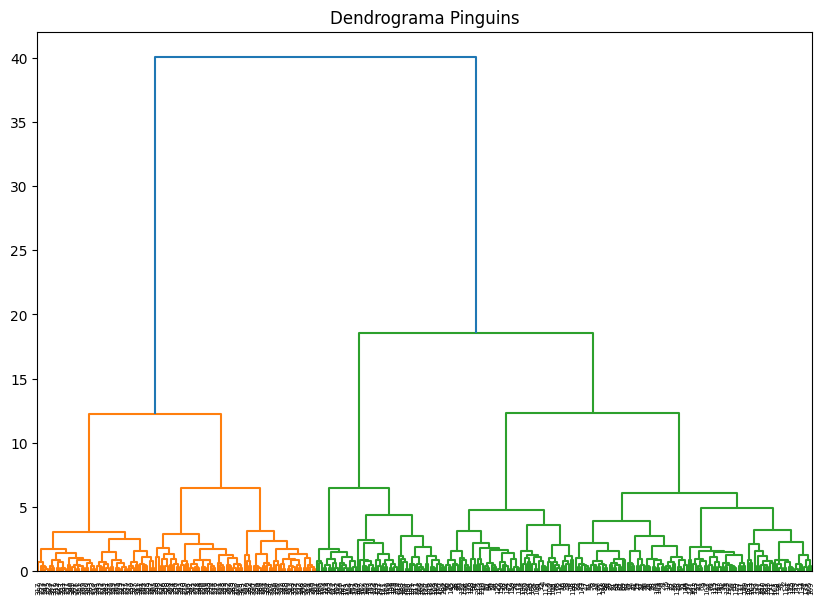

In [27]:
# Criando o Dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma Pinguins")
dend = shc.dendrogram(shc.linkage(peng_scaled, method='ward'))
plt.show()

## 2) Avalie os grupos

Descreva os grupos:


### 2.1 Quantos pinguins de cada espécie há em cada grupo?


In [44]:
# Adicionando a coluna 'species' ao dataframe peng_quant
peng_quant['Espécie'] = peng['species']
peng_quant['Grupo'] = cluster.labels_

# Contando o número de pinguins de cada espécie em cada grupo
species_count = peng_quant.groupby(['Espécie', 'Grupo']).size().reset_index(name='Quantidade')

# Descrevendo as variáveis quantitativas de cada grupo
group_description = peng_quant.groupby('Grupo').describe()

print('QUANTIDADE DE PINGUINS  DE CADA ESPÉCIE EM CADA GRUPO\n')
species_count


QUANTIDADE DE PINGUINS  DE CADA ESPÉCIE EM CADA GRUPO



,Espécie,Grupo,Quantidade
0,Adelie,0,151
1,Chinstrap,0,11
2,Chinstrap,2,57
3,Gentoo,1,123


#### 2.2 Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir'

In [45]:
# Descrevendo as variáveis quantitativas de cada grupo
group_description = peng_quant.groupby('Grupo').describe()
group_description


bill_length_mm                                                      \
               count       mean       std   min   25%   50%    75%   max   
Grupo                                                                      
0              162.0  39.150000  2.936560  32.1  37.0  39.0  41.10  46.9   
1              123.0  47.504878  3.081857  40.9  45.3  47.3  49.55  59.6   
2               57.0  49.752632  2.710107  45.2  47.5  50.2  51.30  58.0   

      bill_depth_mm             ... body_mass_g         cluster            \
              count       mean  ...         75%     max   count mean  std   
Grupo                           ...                                         
0             162.0  18.287654  ...     3968.75  4775.0   162.0  0.0  0.0   
1             123.0  14.982114  ...     5500.00  6300.0   123.0  1.0  0.0   
2              57.0  18.601754  ...     4000.00  4800.0    57.0  2.0  0.0   

                                
       min  25%  50%  75%  max  
Grupo                           
0      0.0  0.0  0.0  0.0  0.0  
1      1.0  1.0  1.0  1.0  1.0  
2      2.0  2.0  2.0  2.0  2.0  

[3 rows x 40 columns]

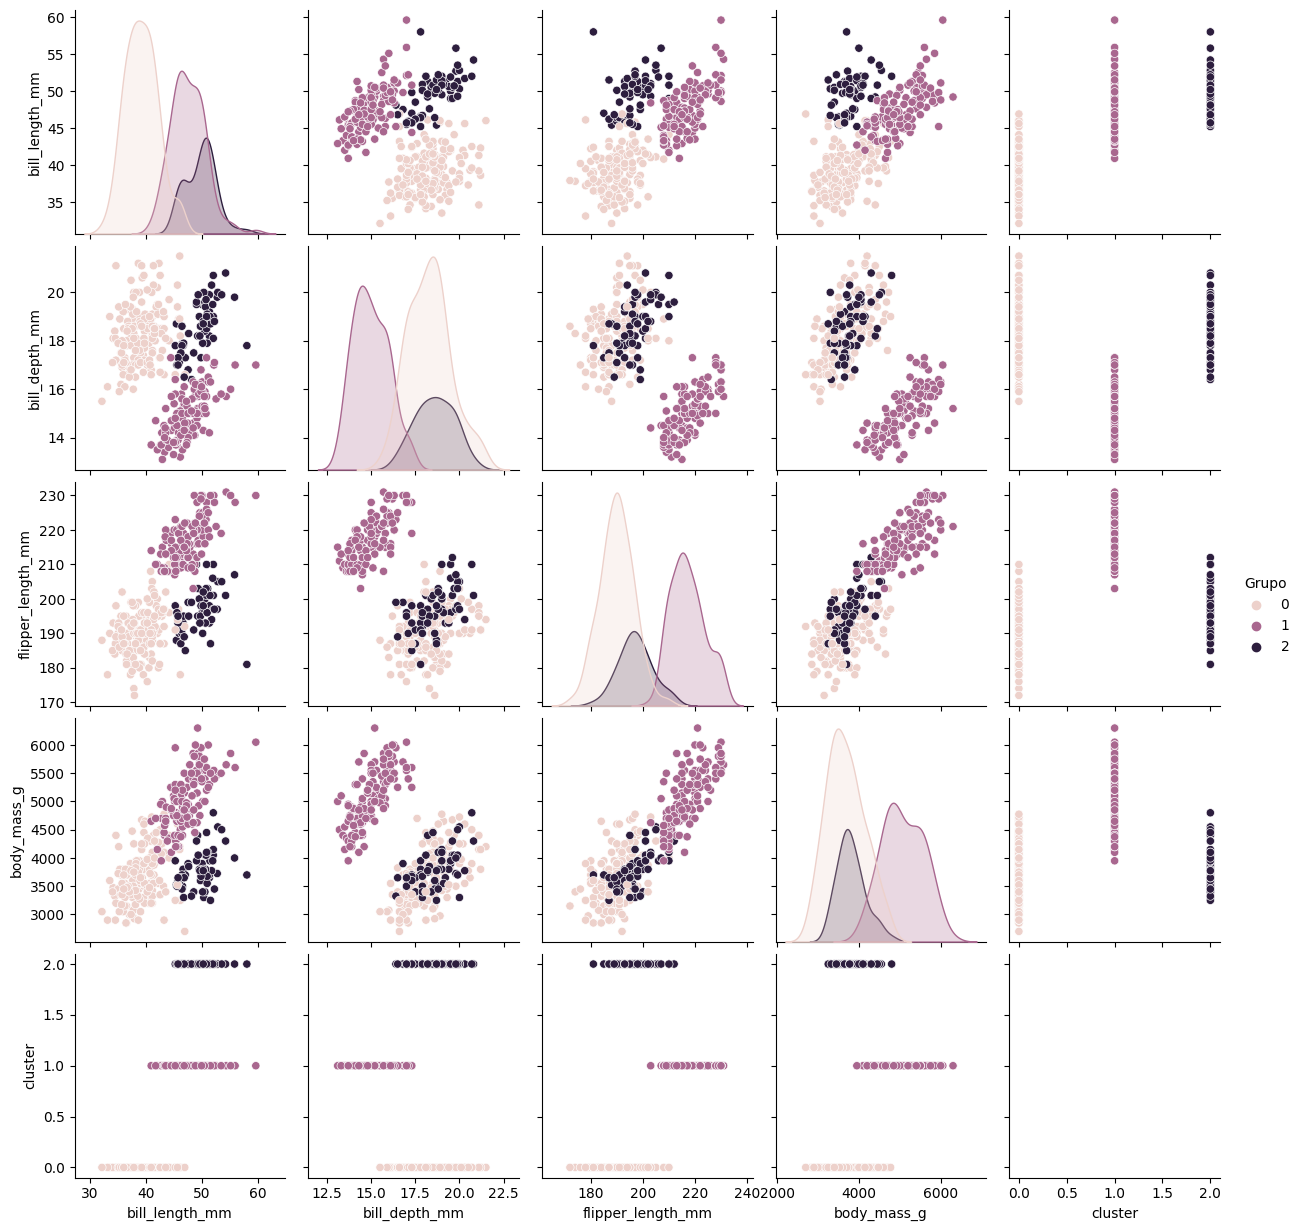

In [52]:
sns.pairplot(data=peng_quant, hue='Grupo')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).


#### 3.1 Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.

In [61]:
# Realizando o agrupamento hierárquico com 4 grupos
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
peng_quant['Grupo'] = cluster.fit_predict(peng_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


#### 3.2 Analise esses agrupamentos

* Quantos pinguins de cada espécie há em cada grupo?
* Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?

In [62]:
# Contando o número de pinguins de cada espécie em cada grupo
species_count = peng_quant.groupby(['Espécie', 'Grupo']).size().reset_index(name='counts')
species_count

,Espécie,Grupo,counts
0,Adelie,1,97
1,Adelie,3,54
2,Chinstrap,1,8
3,Chinstrap,2,57
4,Chinstrap,3,3
5,Gentoo,0,71
6,Gentoo,4,52


In [63]:
# Adicionando a coluna 'sex' ao dataframe peng_quant
peng_quant['sex'] = peng['sex']

# Contando o número de pinguins de cada espécie e sexo em cada grupo
species_sex_count = peng_quant.groupby(['Espécie', 'sex', 'Grupo']).size().reset_index(name='counts')
species_sex_count

,Espécie,sex,Grupo,counts
0,Adelie,Female,1,72
1,Adelie,Female,3,1
2,Adelie,Male,1,21
3,Adelie,Male,3,52
4,Chinstrap,Female,1,8
5,Chinstrap,Female,2,23
6,Chinstrap,Female,3,3
7,Chinstrap,Male,2,34
8,Gentoo,Female,0,9
9,Gentoo,Female,4,49


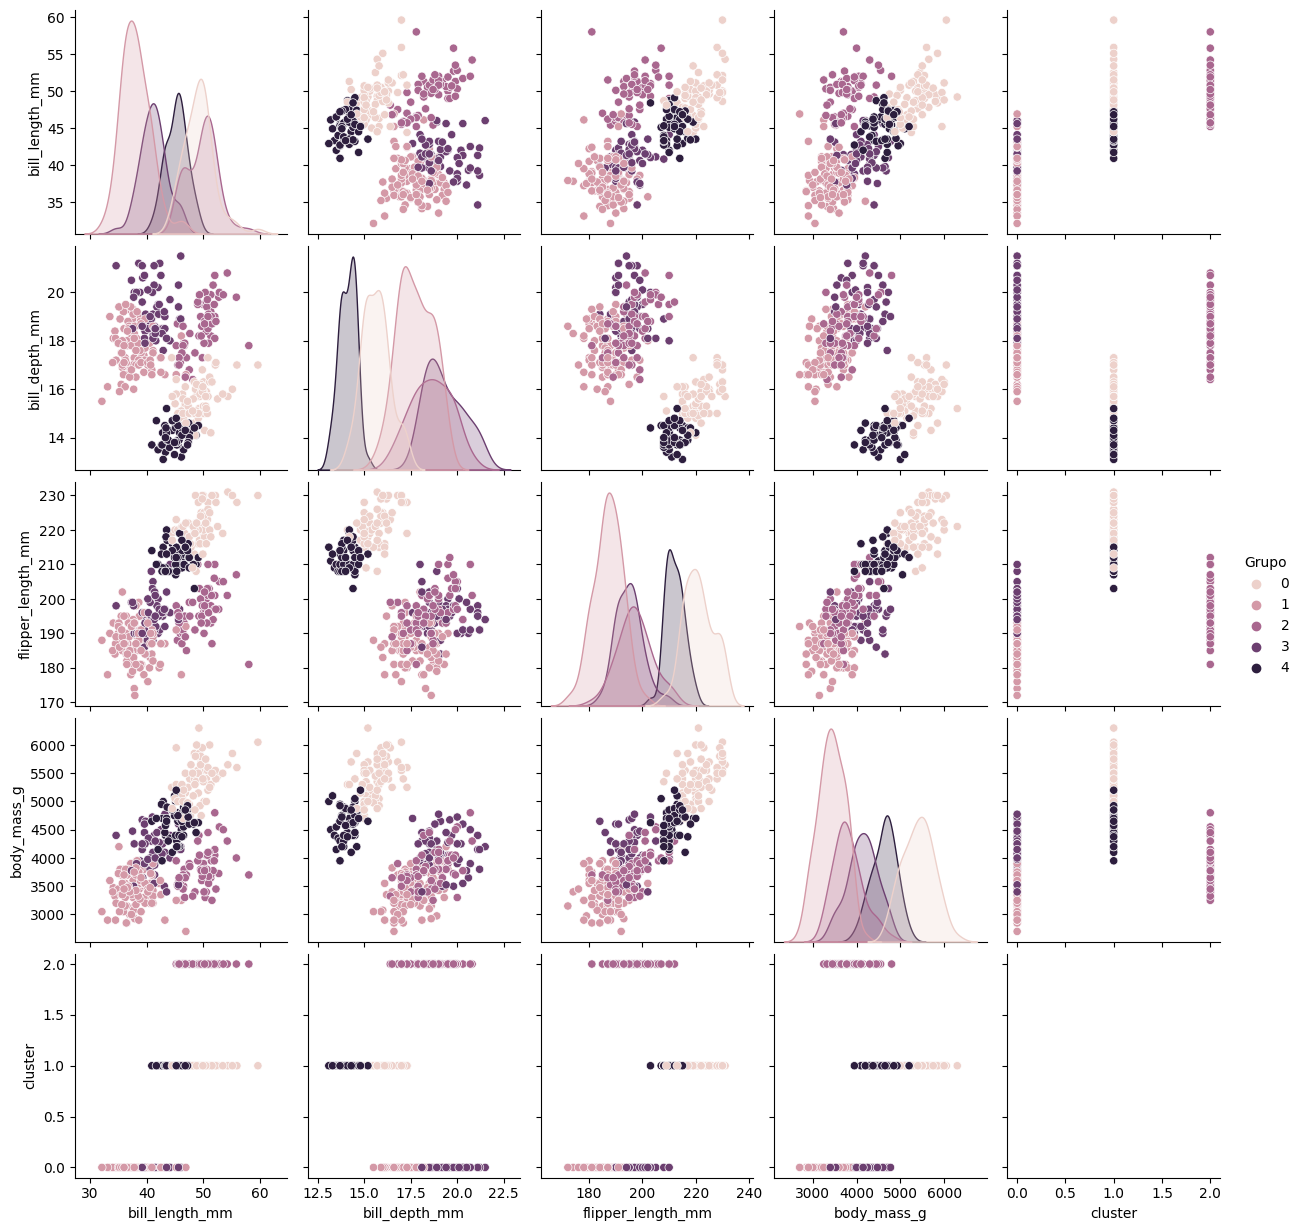

In [65]:
# visualizando as relações entre as variáveis no conjunto de dados
sns.pairplot(data=peng_quant, hue='Grupo')

#### 3.3 Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

Com base nos resultados sobre os agrupamentos de 3 e 5:

*No agrupamento com 3 clusters:*
- O Grupo 0 é dominado pela espécie Adelie, com uma pequena quantidade de Chinstrap.
- O Grupo 1 é inteiramente composto pela espécie Gentoo.
- O Grupo 2 contém apenas a espécie Chinstrap.

*No agrupamento com 5 clusters:*
- O Grupo 0 é dominado pela espécie Gentoo, com uma pequena quantidade de Chinstrap.
- O Grupo 1 é dominado pela espécie Adelie, com uma pequena quantidade de Chinstrap.
- O Grupo 2 contém apenas a espécie Chinstrap.
- O Grupo 3 é dominado pela espécie Adelie, com uma pequena quantidade de Chinstrap.
- O Grupo 4 é dominado pela espécie Gentoo.

*Quando consideramos o sexo dos pinguins, observa-se que:*
- No agrupamento de 3 clusters, o Grupo 3 é quase inteiramente composto por pinguins machos da espécie Adelie.
- No agrupamento de 5 clusters, o Grupo 3 é dominado por pinguins machos da espécie Adelie, enquanto o Grupo 4 é dominado por pinguins fêmeas da espécie Gentoo.

Esses padrões sugerem que o agrupamento está capturando diferenças nas características medidas entre as espécies de pinguins, e possivelmente também entre os sexos dentro das espécies. Isso faz sentido, pois diferentes espécies de pinguins podem ter diferentes tamanhos e formas corporais, e dentro de uma espécie, os machos e as fêmeas podem diferir em tamanho e forma.



---


Em relação a capturar a diferença entre as espécies de pinguins, ambos os agrupamentos fazem um bom trabalho, pois cada espécie tende a ser agrupada predominantemente em um ou dois grupos.

No entanto, levando em conta o sexo dos pinguins, o agrupamento de 5 grupos pode ser considerado “melhor”, pois há uma separação mais clara entre os machos e as fêmeas, especialmente na espécie Gentoo.

Por outro lado, para manter o modelo o mais simples possível, o agrupamento de 3 grupos pode ser conciderado melhor, pois ele captura a maior parte da variação entre as espécies com menos grupos.